In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import nltk
import re
from wordcloud import WordCloud, STOPWORDS
from nltk.stem import PorterStemmer 
from nltk.tokenize import word_tokenize


In [2]:
df=pd.read_csv('/Users/richu/OneDrive/Desktop/HDS/Tweets/train_E6oV3lV.csv',index_col=False)

In [3]:
df1=df.copy()
df2=df.copy()
pos=df1[df1['label']==0]
neg=df2[df2['label']==1]

Positive words


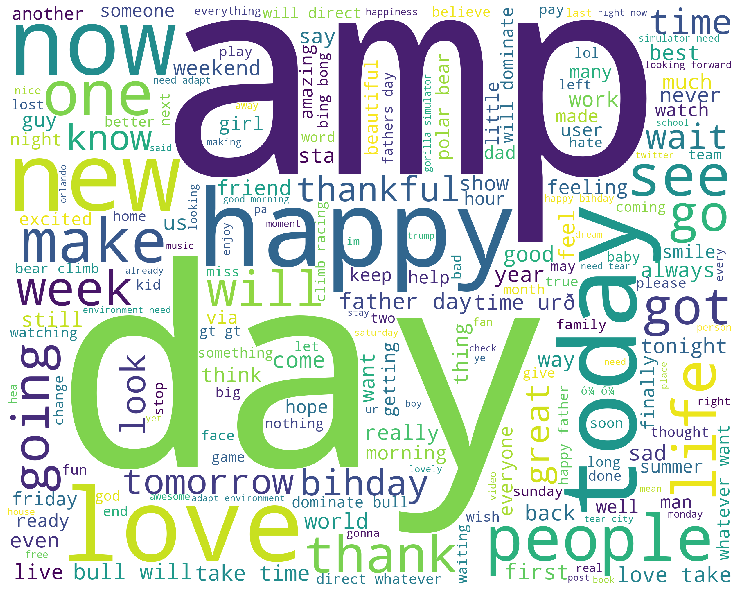

Negative words


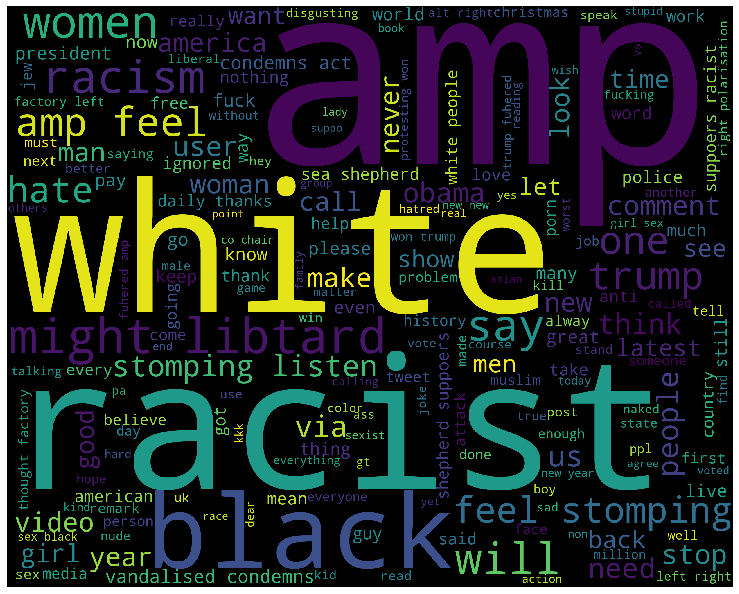

In [4]:
def wordcloud_draw(data, color = 'black'):
    words = ' '.join(data)
    cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and not word.startswith('#')
                                and word != 'RT'
                            ])
    wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color=color,
                      width=2500,
                      height=2000
                     ).generate(cleaned_word)
    plt.figure(1,figsize=(13, 13))
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
    
print("Positive words")
wordcloud_draw(pos['tweet'],'white')
print("Negative words")
wordcloud_draw(neg['tweet'])

In [5]:
def words(tweets):
    l=[]
    for tweet in tweets:
        l.extend(str(tweet).split())
    return l

In [6]:
def get_word_features(wordlist):
    wordlist = nltk.FreqDist(wordlist)
    features = wordlist.keys()
    return features
w_features = get_word_features(words(df['tweet']))

In [7]:
def extract_features(document):
    document_words = set(document)
    features = {}
    for word in w_features:
        features['contains(%s)' % word] = (word in document_words)
    return features

In [8]:
dfword=pd.read_csv('/Users/richu/OneDrive/Desktop/HDS/Tweets/words.csv')
d=dfword.head(4)
dn=dfword.tail(4)

In [9]:
#plt.scatter(dfword['Words'],dfword['sentiment'])

#https://www.speckbit.com/roadmap/data-wrangling/5/1


In [10]:
def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
    
    return input_txt

In [11]:
df['cleaned_tweets'] = np.vectorize(remove_pattern)(df['tweet'], "@[\\w]*")
df['cleaned_tweets'] = df['cleaned_tweets'].str.replace("[^a-zA-Z#]", " ")
df['cleaned_tweets'] = df['cleaned_tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))
tokenized_tweet = df['cleaned_tweets'].apply(lambda x: x.split())
tokenized_tweet.head()
stemmer = PorterStemmer()
tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x])


In [35]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

dfword['sentiment']=le.fit_transform(dfword['sentiment'])


In [13]:
from sklearn.feature_extraction.text import CountVectorizer
# list of text documents
# create the transform
vectorizer = CountVectorizer()
# tokenize and build vocab
vectorizer.fit(dfword['Words'])
# printing all the words 
print(vectorizer.vocabulary_)
# encoding the document
vector = vectorizer.transform(dfword['Words'])
# summary of the encoded vector

print(vector.shape)
print(type(vector))
print(vector.toarray())

{'faced': 2244, 'faces': 2245, 'abnormal': 1, 'abolish': 2, 'abominable': 3, 'abominably': 4, 'abominate': 5, 'abomination': 6, 'abort': 7, 'aborted': 8, 'aborts': 9, 'abrade': 12, 'abrasive': 13, 'abrupt': 14, 'abruptly': 15, 'abscond': 16, 'absence': 17, 'absent': 18, 'minded': 4066, 'absentee': 19, 'absurd': 20, 'absurdity': 21, 'absurdly': 22, 'absurdness': 23, 'abuse': 26, 'abused': 27, 'abuses': 28, 'abusive': 29, 'abysmal': 30, 'abysmally': 31, 'abyss': 32, 'accidental': 35, 'accost': 47, 'accursed': 50, 'accusation': 51, 'accusations': 52, 'accuse': 53, 'accuses': 54, 'accusing': 55, 'accusingly': 56, 'acerbate': 57, 'acerbic': 58, 'acerbically': 59, 'ache': 60, 'ached': 61, 'aches': 62, 'achey': 63, 'aching': 68, 'acrid': 69, 'acridly': 70, 'acridness': 71, 'acrimonious': 72, 'acrimoniously': 73, 'acrimony': 74, 'adamant': 77, 'adamantly': 78, 'addict': 81, 'addicted': 82, 'addicting': 83, 'addicts': 84, 'admonish': 94, 'admonisher': 95, 'admonishingly': 96, 'admonishment': 97

In [27]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
fm=vector
tv=dfword['sentiment']
print(fm.shape)

print(tv.shape)

(7076, 6865)
(7076,)


In [28]:
model.fit(X=fm,y=tv)

c:\users\richu\appdata\local\programs\python\python37\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
result=[]
for i in df['cleaned_tweets']:
    n=[i]
    
    vector1 = vectorizer.transform(n)
    print(vector1.toarray())
    fm=vector1
    a=model.predict(fm)
    if 1 in a:
        print('OHHHHHHH YEAHHHHHHHHHHHHHH!!!')
        result.append('YES')
    else:
        print('BOO')
        result.append('NO')

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH

BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 

BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHH

BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHH

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHH

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 

OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 

[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHH

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]

[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[

[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]

BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHH

OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHH

BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHH

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO


BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 

OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!


[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OH

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OH

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH

[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO


[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OH

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO


BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHH

BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO


[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 

[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHH

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHH

BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BO

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]

BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 

BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 

OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[

BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHH

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 

BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]

[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]

OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]


BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 

[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]

[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BO

BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHH

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OH

[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO


[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]

OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHH

BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]


[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[

[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHH

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ..

OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 

[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
OHHHHHHH YEAHHHHHHHHHHHHHH!!!
[[0 0 0 ... 0 0 0]]
BOO
[[0 0 0 ... 0 0 0]]


In [32]:
df['POSITIVE??']=result

In [33]:
df

,id,label,tweet,cleaned_tweets,POSITIVE??
0,1,0,@user when a father is dysfunctional and is s...,when father dysfunctional selfish drags kids i...,NO
1,2,0,@user @user thanks for #lyft credit i can't us...,thanks #lyft credit cause they offer wheelchai...,NO
2,3,0,bihday your majesty,bihday your majesty,NO
3,4,0,#model i love u take with u all the time in ...,#model love take with time,YES
4,5,0,factsguide: society now #motivation,factsguide society #motivation,NO
5,6,0,[2/2] huge fan fare and big talking before the...,huge fare talking before they leave chaos disp...,NO
6,7,0,@user camping tomorrow @user @user @user @use...,camping tomorrow danny,NO
7,8,0,the next school year is the year for exams.ð...,next school year year exams think about that #...,NO
8,9,0,we won!!! love the land!!! #allin #cavs #champ...,love land #allin #cavs #champions #cleveland #...,YES
9,10,0,@user @user welcome here ! i'm it's so #gr...,welcome here,NO
